In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
Phones=[]
Prices=[]
Description=[]
Reviews=[]

In [3]:
for i in range(2,6):
    url="https://www.flipkart.com/search?q=mobiles+under+20000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(i)
    r=requests.get(url)
    #print(r)

    soup=BeautifulSoup(r.text,"lxml")
    box=soup.find("div",class_="_1YokD2 _3Mn1Gg")


    
    phone=box.find_all("div",class_="_4rR01T")
    for i in phone:
        name=i.text
        Phones.append(name)

    price=box.find_all("div",class_="_30jeq3 _1_WHN1")
    for i in price:
        p=i.text
        Prices.append(p)
        
    description=box.find_all("ul",class_="_1xgFaf")
    for i in description:
        des=i.text
        Description.append(des)
    
    review=box.find_all("div",class_="_3LWZlK")
    for i in review:
            re=i.text
            Reviews.append(re)

    
print(len(Phones))
print(len(Prices))
print(len(Description))
print(len(Reviews))


96
96
96
96


In [4]:
Flipkart_data=pd.DataFrame({
    "Phones":Phones,
    "Prices":Prices,
    "Description":Description,
    "Reviews":Reviews
    })

In [5]:
Flipkart_data

,Phones,Prices,Description,Reviews
0,"realme 11 5G (Glory Black, 256 GB)","₹17,999",8 GB RAM | 256 GB ROM | Expandable Upto 2 TB17...,4.3
1,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128...","₹17,726",8 GB RAM | 128 GB ROM17.07 cm (6.72 inch) Disp...,4.4
2,"REDMI 12 5G (Pastel Blue, 256 GB)","₹14,999",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB17...,4.2
3,"SAMSUNG Galaxy M14 5G (Icy Silver, 128 GB)","₹11,843",6 GB RAM | 128 GB ROM16.76 cm (6.6 inch) Displ...,4.2
4,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...","₹19,595",8 GB RAM | 256 GB ROM17.07 cm (6.72 inch) Disp...,4.4
...,...,...,...,...
91,"REDMI Note 10S (Cosmic Purple, 128 GB)","₹14,399",6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,4.4
92,"SAMSUNG Galaxy A04s (Copper, 64 GB)","₹11,999",4 GB RAM | 64 GB ROM16.51 cm (6.5 inch) HD+ Di...,4.1
93,"REDMI Note 12 5G (Frosted Green, 128 GB)","₹15,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,3.9
94,"SAMSUNG Galaxy A05s (Light Green, 128 GB)","₹12,870",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.4


In [8]:
#Flipkart_data['Prices']=Flipkart_data['Prices'].str.replace(',','')
#Flipkart_data['Prices']=Flipkart_data['Prices'].str.replace('₹','')
Flipkart_data['Prices']=pd.to_numeric(Flipkart_data['Prices'])
Flipkart_data['Reviews']=pd.to_numeric(Flipkart_data['Reviews'])

top_10=Flipkart_data.sort_values(by='Prices',ascending=False).head(10)
top_10

,Phones,Prices,Description,Reviews
90,"OPPO F23 5G (Bold Gold, 256 GB)",22999,8 GB RAM | 256 GB ROM | Expandable Upto 1 TB17...,4.2
29,"IQOO Z7s 5G (Pacific Night, 128 GB)",19999,8 GB RAM | 128 GB ROM16.21 cm (6.38 inch) Disp...,4.3
83,"ASUS Zenfone 2 ZE551ML (Black, 32 GB)",19999,4 GB RAM | 32 GB ROM | Expandable Upto 64 GB13...,3.9
31,"IQOO Z7S 5G (Pacific Night, 128 GB)",19990,8 GB RAM | 128 GB ROM16.26 cm (6.4 inch) Displ...,4.3
38,"REDMI Note 13 5G (Arctic White, 256 GB)",19949,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.1
14,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",19745,8 GB RAM | 256 GB ROM17.07 cm (6.72 inch) Disp...,4.4
4,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",19595,8 GB RAM | 256 GB ROM17.07 cm (6.72 inch) Disp...,4.4
13,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",19574,8 GB RAM | 256 GB ROM17.07 cm (6.72 inch) Disp...,4.4
58,"SAMSUNG Galaxy A15 5G (Blue Black, 128 GB)",19499,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2
44,"SAMSUNG Galaxy A15 5G (Blue Black, 128 GB)",19499,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.2


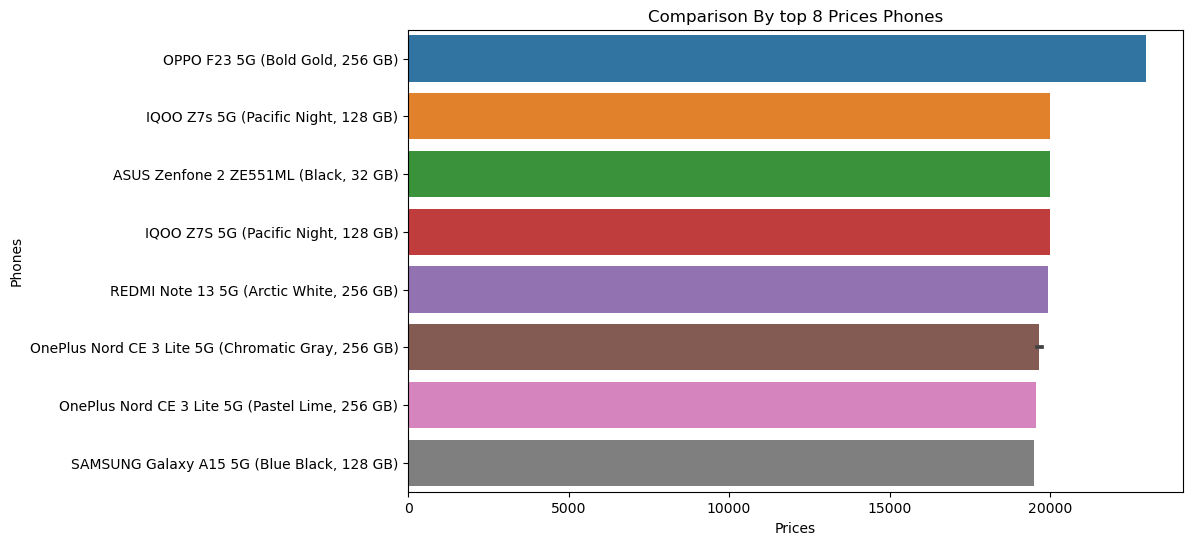

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_10['Phones'],x=top_10['Prices'])
plt.title("Comparison By top 8 Prices Phones")
plt.show()

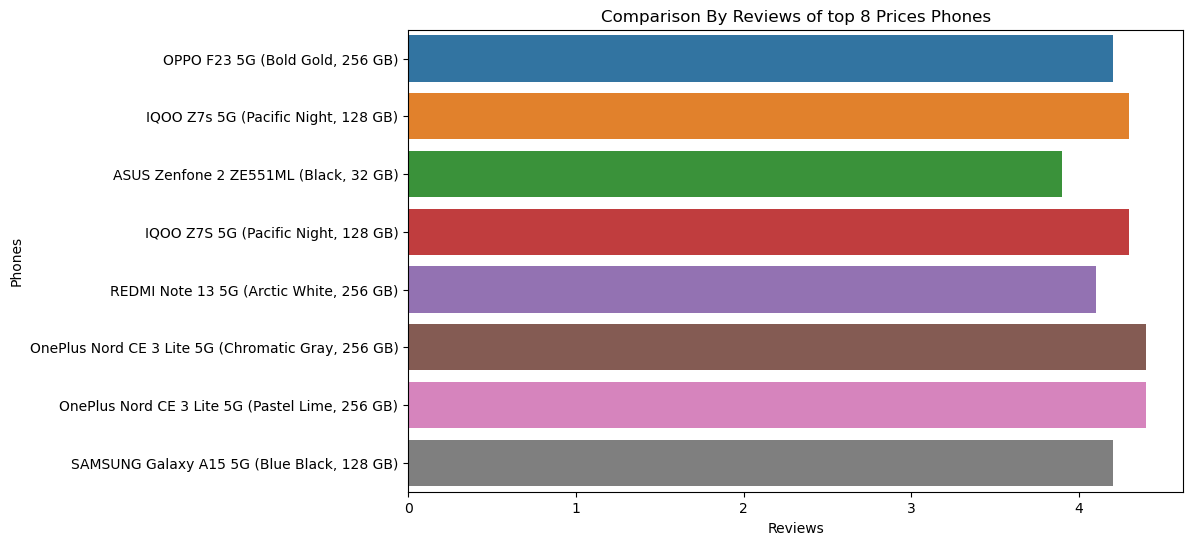

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_10['Phones'],x=top_10['Reviews'])
plt.title("Comparison By Reviews of top 8 Prices Phones")
plt.show()